# Lab-2: Linear Regression.
_____
##### In this lab, you will Practice applying different Regression algorithms, and play with models to experiece underfitting vs. overfitting.

### Objectives:

1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression

### Linear Regression
1. What is regression? What's Linear Regression?
2. When Do We Need Regression?

</span>

####  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just one explanatory variables.

##### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load and Explore the dataset

In [5]:
dataset = pd.read_csv('student_scores.csv')
dataset.shape

(25, 2)

In [6]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Data Plotting:
Task:
plot the data points on 2-D graph to view our dataset and see if we can manually find any relationship between the data:

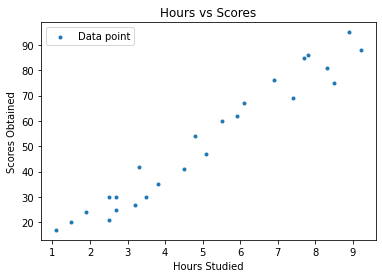

In [10]:
# Write the plotting code here, support it with title, axes labels and legend. (5 lines)
plt.scatter(dataset['Hours'], dataset['Scores'], marker='.')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.title('Hours vs Scores')
plt.legend(['Data point'])

#### Data Preparation
Task: for learning model in sklearn lib, the X (regressors/input matrix) should be of 2 dimensions (num_samples x num_features). Your 1st task is to add another dimension for X variable to conver it from a vector (num_samples,) to matrix (num_samples x 1).

Task: Split the data to train and test with ratios 80% and 20% respectively.

In [11]:
from sklearn.model_selection import train_test_split

X = dataset['Hours'].values
y = dataset['Scores'].values

# Write one line to add one more dimension for X.
X = np.expand_dims(X,axis=1) # (25, 1, 7, 8)

#other options to add one dimension
# X=X[:, np.newaxis] --- answer (25, 1)
# X=X[....,np.newaxis] --- answer(25, 7, 8, 1)

# print the values
print(X.shape)

# Write one line to split the dataset using train_test_split function.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(25, 1)


In [12]:
ones = np.ones((25, 7, 8))
print(ones[...,np.newaxis].shape)

(25, 7, 8, 1)


#### Build Linear Regression Model
Task: train linear regression model with the fit function.
Then print the coefficient and the intercept term.

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Write code here (3 lines) fit the model and print the coefficient and the intercept.
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434683


#### Evaluate the performance of the linear regression model on test dataset
Task: Use the predict function in the model to predict the output of the testset and call it $y\_pred$.

In [14]:
# Write one line to predict the response of the X_test of the fitted LR model.
# all sk models have fit and predict, fit for training and predict for ..
y_pred = regressor.predict(x_test)

Task: Measure the performance of the model using the (1) root mean squared error, (2) mean absolute error and coefficient of determination $R^2$.

Issues:

1- What RMSE, MAE and R-squared coefficient tell us?

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', mean_squared_error(y_test, y_pred, squared=True)) #always pass the truth
print('r2_score', r2_score(y_test, y_pred))

MAE 4.183859899002975
RMSE 21.5987693072174
r2_score 0.9454906892105356


### P-Value
What is p-value and how can we use it?

In [18]:
import statsmodels.api as sm

x_train_w_const = sm.add_constant(x_train)
mod = sm.OLS(y_train, x_train_w_const)
fit_result = mod.fit()
p_values = fit_result.summary2().tables[1]['P>|t|']
print(p_values)

const    5.174991e-01
x1       2.789440e-13
Name: P>|t|, dtype: float64


### Multiple Linear Regression
Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.
We seek a model of the form:

     B = A0 + A1 * X1 + A2 * X2 + A3 * X3 + A4 * X4.

#### Load and Explore the dataset

In [19]:
%matplotlib inline
dataset = pd.read_csv('petrol_consumption.csv')


In [20]:
dataset.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


#### Data preparation
Task: Split the data to train and test with ratios 80% and 20% respectively.

In [6]:

X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']
print(X.shape)
from sklearn.model_selection import train_test_split

# write the splitting code here (1 line).
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'dataset' is not defined

#### Building Linear Regression model
Task: train linear regression model with the fit function.
Then print the coefficient and the intercept term.

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Write code here (3 lines) fit the model and print the coefficient and the intercept.
# they are only 4
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]
425.5993322032417


#### Evaluate the performance of the linear regression model on test dataset
Task: Use the predict function in the model to predict the output of the testset and call it $y\_pred$.
And print it.

In [30]:
# Write one line to predict the response of the X_test of the fitted LR model.
y_pred = regressor.predict(x_test)

Measure the performance of the model using the (1) root mean squared error, (2) mean absolute error and coefficient of determination $R^2$.

In [34]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))
# print('Root Mean Squared:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 56.822247478964684
Mean Squared Error: 68.31064915215165
r2 0.2036193241012182


In [35]:
import statsmodels.api as sm

x_train_w_const = sm.add_constant(x_train)
mod = sm.OLS(y_train, x_train_w_const)
fit_result = mod.fit()
p_values = fit_result.summary2().tables[1]['P>|t|']
print(p_values)

const                           4.296987e-02
Petrol_tax                      6.694352e-03
Average_income                  3.248926e-03
Paved_Highways                  2.071597e-01
Population_Driver_licence(%)    2.902663e-07
Name: P>|t|, dtype: float64


### Polynomial Regression
Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders and maybe with interactive variables.
1. Why do we need it?
2. Which order of the polynomial should we choose?
3. should we always pick the most complex model?

#### We will create a synthetic dataset by adding some random gaussian noise to a cosinusoidal function.

#### Import Libraries

In [1]:
# why we need it? -> we are raising the relationship to some high order, based on linear regression, therefore polynomial regression
print(__doc__)

from sklearn.pipeline import Pipeline #pipeline to run different things together
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


Automatically created module for IPython interactive environment


#### Create sinusoidal function

In [2]:

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


#### Create a synthetic dataset by adding some random gaussian noise to a cosinusoidal function

In [8]:

np.random.seed(0)

# to generate 30 samples
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))

# eps is some noise on the end added to the true function
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# next split it into training set and validation set
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.


Task: Write a pipeline of PolynomialFeatures transformation then, LinearRegression mode to be applied on X & y.
Then get the validation score with the MSE metric.

Q: What's your observation?

(6, 1)
(6, 1)
(6, 1)


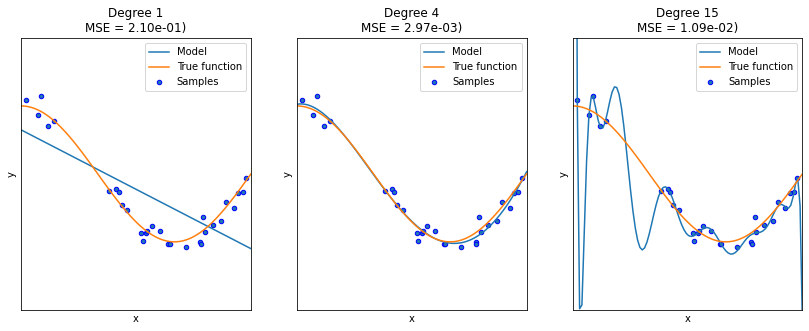

In [11]:

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Define the following object appropriately
    polynomial_features = PolynomialFeatures(degrees[i])
    
    linear_regression = LinearRegression() # we have the model
    pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(x_train[..., np.newaxis], y_train)

    # Evaluate the models using crossvalidation set
    # To evaluate the pipeline.
    mse_score = metrics.mean_squared_error(y_val, pipeline.predict(x_val[:, np.newaxis]))

    print(x_val[:, np.newaxis].shape)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e})".format(
        degrees[i], mse_score))
plt.show()

# first one the model is underfitting. last one the model is overfitting
# there's noise and it is trying to pass through each node